# Tweets about Covid-19 vaccines

In [1]:
# Import packages
import nltk
from pprint import pprint
import yaml
import sys
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import neattext as ntx
from wordcloud import WordCloud

## Part 1: EDA on post_covidTweets_v2.csv

In [2]:
data = pd.read_csv('data/post_covidTweets_v2.csv')
data.head()

datetime             tweet_id  \
0  2023-02-27 23:55:11+00:00  1630355896990679042   
1  2023-02-27 23:53:35+00:00  1630355498120941568   
2  2023-02-27 23:52:12+00:00  1630355150052155392   
3  2023-02-27 23:52:00+00:00  1630355096205774848   
4  2023-02-27 23:51:45+00:00  1630355033077194756   

                                                text        username  \
0  @KatwithaC @jmarlinmusic @IscariotMeren @Alisa...  RochelleAdame7   
1  @HawkInATX @LankeyPants250 @vancemurphy @TinFo...     brian_tietz   
2  @Ayjchan With DOE finding that a lab leak is t...  LarryBoorstein   
3  With DOE finding that a lab leak is the most l...  LarryBoorstein   
4  Governor DeSantis Rips Authorities &amp; the C...     VigilantFox   

                                                 url  user_location  \
0  https://twitter.com/RochelleAdame7/status/1630...            NaN   
1  https://twitter.com/brian_tietz/status/1630355...            NaN   
2  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
3  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
4  https://twitter.com/VigilantFox/status/1630355...            USA   

   like_count  retweet_count  follower_count  reply_count  verified hashtags  
0           0              0               5            0     False      NaN  
1           0              0              75            1     False      NaN  
2           0              0            2866            0     False      NaN  
3           0              0            2866            0     False      NaN  
4         662            169          360067           31     False      NaN

In [3]:
data.shape

(40886, 12)

In [4]:
data.isnull().sum()

datetime              0
tweet_id              0
text                  0
username              0
url                   0
user_location     13247
like_count            0
retweet_count         0
follower_count        0
reply_count           0
verified              0
hashtags          26186
dtype: int64

### Simple visualisation (E.g Visualizing Tweet count vs Location)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'NY'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'South Dakota '),
  Text(4, 0, 'North Vancouver, BC'),
  Text(5, 0, 'Karlsruhe, Germany'),
  Text(6, 0, 'Durham, NC'),
  Text(7, 0, 'USA'),
  Text(8, 0, 'Tampa, Florida'),
  Text(9, 0, 'New South Wales '),
  Text(10, 0, 'somewhere in PAC NW'),
  Text(11, 0, 'Earth.'),
  Text(12, 0, 'State with freedom of choice '),
  Text(13, 0, 'Virginia, USA'),
  Text(14, 0, 'New Zealand'),
  Text(15, 0, 'Berlin - carbonlaw.eu/current'),
  Text(16, 0, 'Nashville, TN'),
  Text(17, 0, 'Los Angeles'),
  Text(18, 0, 'Chicago, Illinois'),
  Text(19, 0, 'North Idaho, USA')])

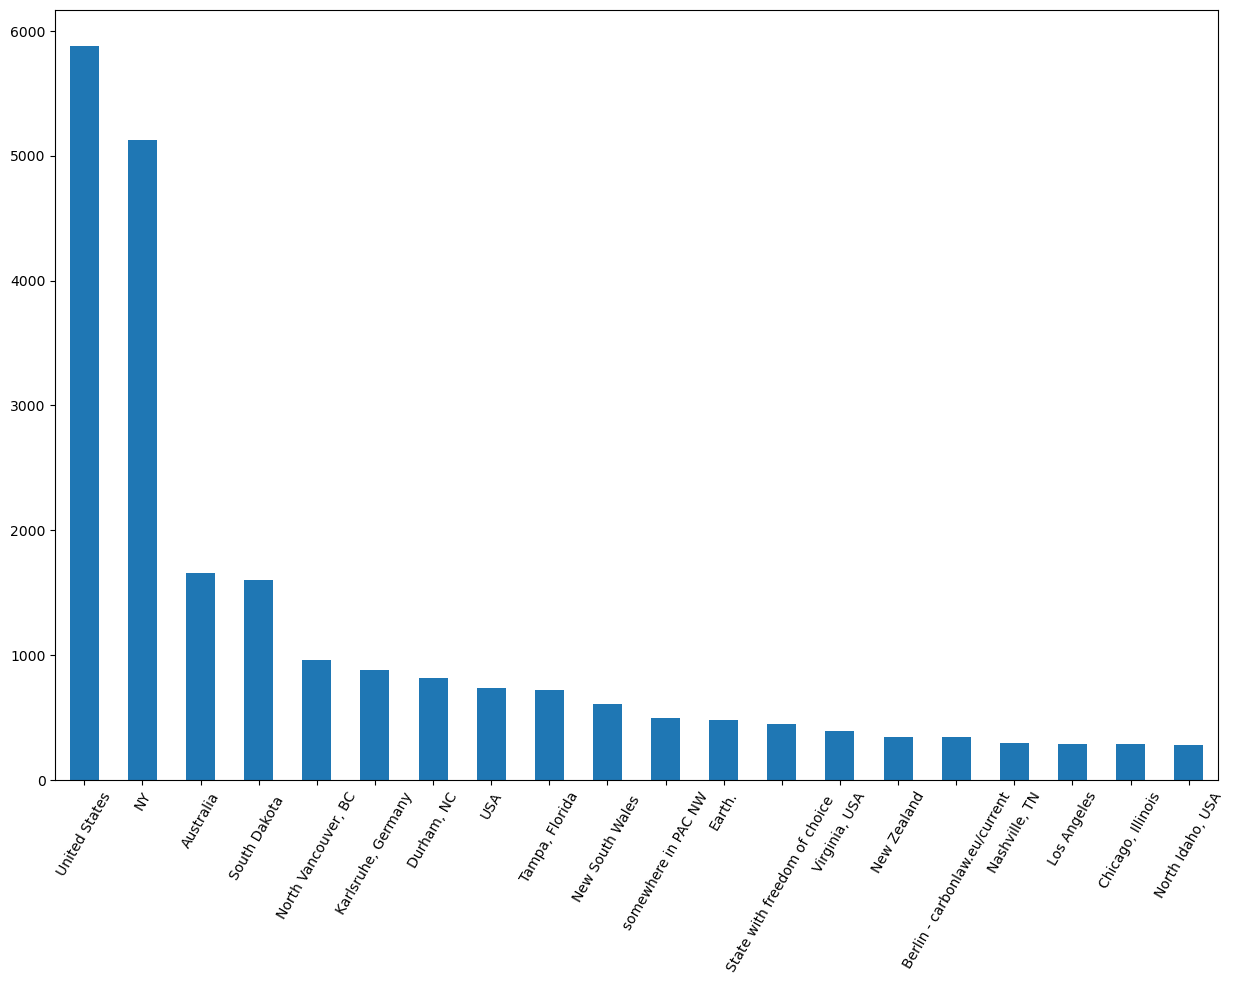

In [5]:
plt.figure(figsize=(15,10))
data['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

### Word cloud in general (What do ppl talk about - Most frequent words or top keywords) 

(-0.5, 999.5, 499.5, -0.5)

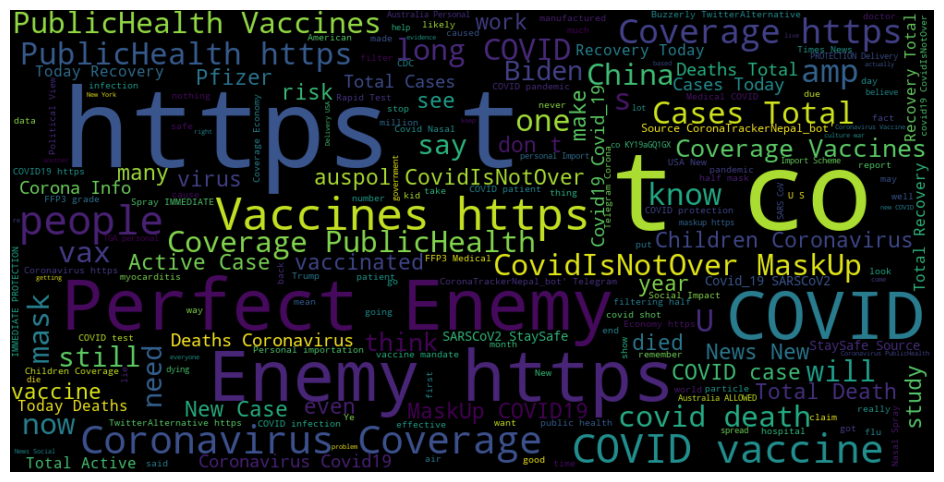

In [6]:
words = ' '.join([word for word in data['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

### Check for duplicate tweets based on the tweet content

In [7]:
duplicate_tweets = data[data.duplicated(['text'])]
print('Number of duplicate tweets:', len(duplicate_tweets))

Number of duplicate tweets: 1519


### Drop duplicate tweets

In [8]:
data = data.drop_duplicates('text')
data.shape

(39367, 12)

### <font color=#FF0000>**Sentiment Analysis (using Textblob)**</font> <br>
**Polarity:** 1 means positive statement, -1 means a negative statement and 0 means neutral.
<br>
**Subjectivity:** Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is a float which lies in the range of [0,1].

### Clean the data using neattext library

In [9]:
data['clean_data'] = data['text'].apply(ntx.remove_hashtags)
data['clean_data'] = data['clean_data'].apply(ntx.remove_urls)
data['clean_data'] = data['clean_data'].apply(ntx.remove_userhandles)
data['clean_data'] = data['clean_data'].apply(ntx.remove_multiple_spaces)
data['clean_data'] = data['clean_data'].apply(ntx.remove_special_characters)

In [10]:
data['clean_data']

0         Did I say it was evil Did I say dont get it N...
1         The only thing that could POSSIBLY alleviate ...
2         With DOE finding that a lab leak is the most ...
3        With DOE finding that a lab leak is the most l...
4        Governor DeSantis Rips Authorities amp the Cor...
                               ...                        
40881    Thats a question for Apple White House dodges ...
40882    Covid now mainly disease of elderly NIne in 10...
40883    Republicans demand an END to Bidens military v...
40884    Republicans threaten war with Apple if it remo...
40885    Bill Clinton 76 tests positive for COVID Forme...
Name: clean_data, Length: 39367, dtype: object

In [11]:
data.shape

(39367, 13)

### Using stopwords to remove words that are generally considered to be of little value 

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [13]:
stop_words = stopwords.words('english')   
len(stop_words)

179

In [14]:
def stopWords(tweet):
    clean_tweet = tweet
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
    return clean_tweet

In [15]:
data['clean_data'] = data['clean_data'].apply(lambda x: stopWords(x))

In [16]:
data.head()

datetime             tweet_id  \
0  2023-02-27 23:55:11+00:00  1630355896990679042   
1  2023-02-27 23:53:35+00:00  1630355498120941568   
2  2023-02-27 23:52:12+00:00  1630355150052155392   
3  2023-02-27 23:52:00+00:00  1630355096205774848   
4  2023-02-27 23:51:45+00:00  1630355033077194756   

                                                text        username  \
0  @KatwithaC @jmarlinmusic @IscariotMeren @Alisa...  RochelleAdame7   
1  @HawkInATX @LankeyPants250 @vancemurphy @TinFo...     brian_tietz   
2  @Ayjchan With DOE finding that a lab leak is t...  LarryBoorstein   
3  With DOE finding that a lab leak is the most l...  LarryBoorstein   
4  Governor DeSantis Rips Authorities &amp; the C...     VigilantFox   

                                                 url  user_location  \
0  https://twitter.com/RochelleAdame7/status/1630...            NaN   
1  https://twitter.com/brian_tietz/status/1630355...            NaN   
2  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
3  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
4  https://twitter.com/VigilantFox/status/1630355...            USA   

   like_count  retweet_count  follower_count  reply_count  verified hashtags  \
0           0              0               5            0     False      NaN   
1           0              0              75            1     False      NaN   
2           0              0            2866            0     False      NaN   
3           0              0            2866            0     False      NaN   
4         662            169          360067           31     False      NaN   

                                          clean_data  
0  Did I say evil Did I say dont get NEWSFLASHI D...  
1  The thing could POSSIBLY alleviate anger guill...  
2  With DOE finding lab leak likely origin COVID1...  
3  With DOE finding lab leak likely origin COVID1...  
4  Governor DeSantis Rips Authorities amp Corpora...

### Assigning Polarity and Subjectivity to the Tweets using Textblob

In [17]:
from textblob import TextBlob

# Function to assign polarity and subjectivity to the tweets
def blob_fun(text):
    senti = TextBlob(text)
    senti_polarity = senti.sentiment.polarity
    senti_subjectivity = senti.sentiment.subjectivity
    
    if senti_polarity > 0:
        res = 'Positive'
    elif senti_polarity < 0:
        res = 'Negative'
    elif senti_polarity == 0:
        res ="Neutral"
        
    result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}
    
    return result

In [18]:
data['results'] = data['clean_data'].apply(lambda x: blob_fun(x))

In [19]:
data.head()

datetime             tweet_id  \
0  2023-02-27 23:55:11+00:00  1630355896990679042   
1  2023-02-27 23:53:35+00:00  1630355498120941568   
2  2023-02-27 23:52:12+00:00  1630355150052155392   
3  2023-02-27 23:52:00+00:00  1630355096205774848   
4  2023-02-27 23:51:45+00:00  1630355033077194756   

                                                text        username  \
0  @KatwithaC @jmarlinmusic @IscariotMeren @Alisa...  RochelleAdame7   
1  @HawkInATX @LankeyPants250 @vancemurphy @TinFo...     brian_tietz   
2  @Ayjchan With DOE finding that a lab leak is t...  LarryBoorstein   
3  With DOE finding that a lab leak is the most l...  LarryBoorstein   
4  Governor DeSantis Rips Authorities &amp; the C...     VigilantFox   

                                                 url  user_location  \
0  https://twitter.com/RochelleAdame7/status/1630...            NaN   
1  https://twitter.com/brian_tietz/status/1630355...            NaN   
2  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
3  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
4  https://twitter.com/VigilantFox/status/1630355...            USA   

   like_count  retweet_count  follower_count  reply_count  verified hashtags  \
0           0              0               5            0     False      NaN   
1           0              0              75            1     False      NaN   
2           0              0            2866            0     False      NaN   
3           0              0            2866            0     False      NaN   
4         662            169          360067           31     False      NaN   

                                          clean_data  \
0  Did I say evil Did I say dont get NEWSFLASHI D...   
1  The thing could POSSIBLY alleviate anger guill...   
2  With DOE finding lab leak likely origin COVID1...   
3  With DOE finding lab leak likely origin COVID1...   
4  Governor DeSantis Rips Authorities amp Corpora...   

                                             results  
0  {'polarity': -0.5, 'subjectivity': 0.625, 'sen...  
1  {'polarity': -0.14166666666666664, 'subjectivi...  
2  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  
3  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  
4  {'polarity': 0.05714285714285714, 'subjectivit...

In [20]:
data.shape

(39367, 14)

In [21]:
data = data.join(pd.json_normalize(data = data['results']))

In [22]:
data.head()

datetime             tweet_id  \
0  2023-02-27 23:55:11+00:00  1630355896990679042   
1  2023-02-27 23:53:35+00:00  1630355498120941568   
2  2023-02-27 23:52:12+00:00  1630355150052155392   
3  2023-02-27 23:52:00+00:00  1630355096205774848   
4  2023-02-27 23:51:45+00:00  1630355033077194756   

                                                text        username  \
0  @KatwithaC @jmarlinmusic @IscariotMeren @Alisa...  RochelleAdame7   
1  @HawkInATX @LankeyPants250 @vancemurphy @TinFo...     brian_tietz   
2  @Ayjchan With DOE finding that a lab leak is t...  LarryBoorstein   
3  With DOE finding that a lab leak is the most l...  LarryBoorstein   
4  Governor DeSantis Rips Authorities &amp; the C...     VigilantFox   

                                                 url  user_location  \
0  https://twitter.com/RochelleAdame7/status/1630...            NaN   
1  https://twitter.com/brian_tietz/status/1630355...            NaN   
2  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
3  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
4  https://twitter.com/VigilantFox/status/1630355...            USA   

   like_count  retweet_count  follower_count  reply_count  verified hashtags  \
0           0              0               5            0     False      NaN   
1           0              0              75            1     False      NaN   
2           0              0            2866            0     False      NaN   
3           0              0            2866            0     False      NaN   
4         662            169          360067           31     False      NaN   

                                          clean_data  \
0  Did I say evil Did I say dont get NEWSFLASHI D...   
1  The thing could POSSIBLY alleviate anger guill...   
2  With DOE finding lab leak likely origin COVID1...   
3  With DOE finding lab leak likely origin COVID1...   
4  Governor DeSantis Rips Authorities amp Corpora...   

                                             results  polarity  subjectivity  \
0  {'polarity': -0.5, 'subjectivity': 0.625, 'sen... -0.500000      0.625000   
1  {'polarity': -0.14166666666666664, 'subjectivi... -0.141667      0.650000   
2  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  0.000000      1.000000   
3  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  0.000000      1.000000   
4  {'polarity': 0.05714285714285714, 'subjectivit...  0.057143      0.400476   

  sentiment  
0  Negative  
1  Negative  
2   Neutral  
3   Neutral  
4  Positive

In [23]:
data.rename(columns={'sentiment': 'Textblob'}, inplace=True)

In [24]:
data.head()

datetime             tweet_id  \
0  2023-02-27 23:55:11+00:00  1630355896990679042   
1  2023-02-27 23:53:35+00:00  1630355498120941568   
2  2023-02-27 23:52:12+00:00  1630355150052155392   
3  2023-02-27 23:52:00+00:00  1630355096205774848   
4  2023-02-27 23:51:45+00:00  1630355033077194756   

                                                text        username  \
0  @KatwithaC @jmarlinmusic @IscariotMeren @Alisa...  RochelleAdame7   
1  @HawkInATX @LankeyPants250 @vancemurphy @TinFo...     brian_tietz   
2  @Ayjchan With DOE finding that a lab leak is t...  LarryBoorstein   
3  With DOE finding that a lab leak is the most l...  LarryBoorstein   
4  Governor DeSantis Rips Authorities &amp; the C...     VigilantFox   

                                                 url  user_location  \
0  https://twitter.com/RochelleAdame7/status/1630...            NaN   
1  https://twitter.com/brian_tietz/status/1630355...            NaN   
2  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
3  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
4  https://twitter.com/VigilantFox/status/1630355...            USA   

   like_count  retweet_count  follower_count  reply_count  verified hashtags  \
0           0              0               5            0     False      NaN   
1           0              0              75            1     False      NaN   
2           0              0            2866            0     False      NaN   
3           0              0            2866            0     False      NaN   
4         662            169          360067           31     False      NaN   

                                          clean_data  \
0  Did I say evil Did I say dont get NEWSFLASHI D...   
1  The thing could POSSIBLY alleviate anger guill...   
2  With DOE finding lab leak likely origin COVID1...   
3  With DOE finding lab leak likely origin COVID1...   
4  Governor DeSantis Rips Authorities amp Corpora...   

                                             results  polarity  subjectivity  \
0  {'polarity': -0.5, 'subjectivity': 0.625, 'sen... -0.500000      0.625000   
1  {'polarity': -0.14166666666666664, 'subjectivi... -0.141667      0.650000   
2  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  0.000000      1.000000   
3  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  0.000000      1.000000   
4  {'polarity': 0.05714285714285714, 'subjectivit...  0.057143      0.400476   

   Textblob  
0  Negative  
1  Negative  
2   Neutral  
3   Neutral  
4  Positive

### Word Cloud

In [25]:
# categorized tweets in seperate Series
positive_tweet =  data[data['Textblob'] == 'Positive']['clean_data']
negative_tweet =  data[data['Textblob'] == 'Negative']['clean_data']
neutral_tweet = data[data['Textblob'] == 'Neutral']['clean_data']

In [26]:
def percent(x,y):
    return print("Percentage of "+ y +" tweets :",round(len(x)/data.shape[0]*100,3),"%")

In [27]:
percent(positive_tweet, 'positive')
percent(negative_tweet, 'negative')
percent(neutral_tweet, 'neutral')

Percentage of positive tweets : 55.011 %
Percentage of negative tweets : 18.556 %
Percentage of neutral tweets : 22.577 %


In [28]:
# Function for creating WordClouds
def cloud_of_Words(tweets,title):
    forcloud = ' '.join([tweet for tweet in tweets])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))

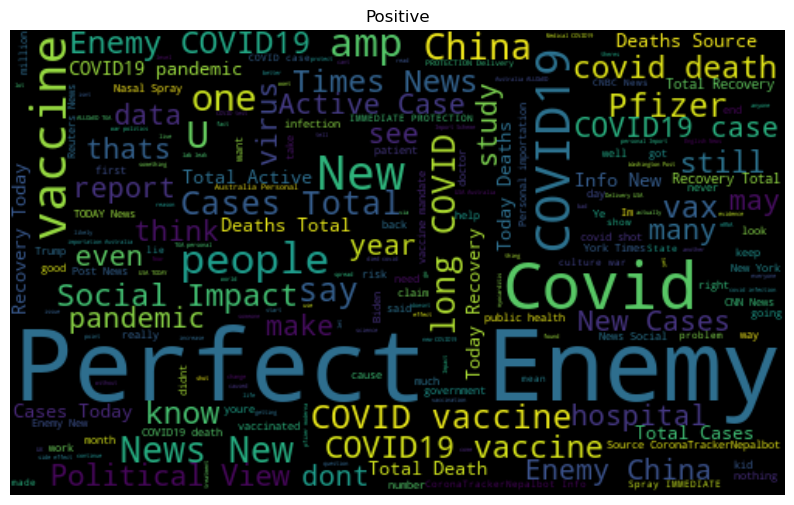

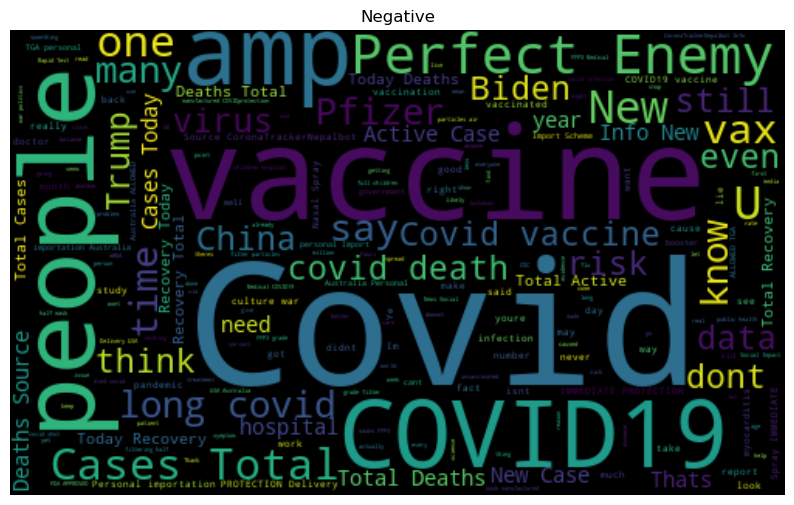

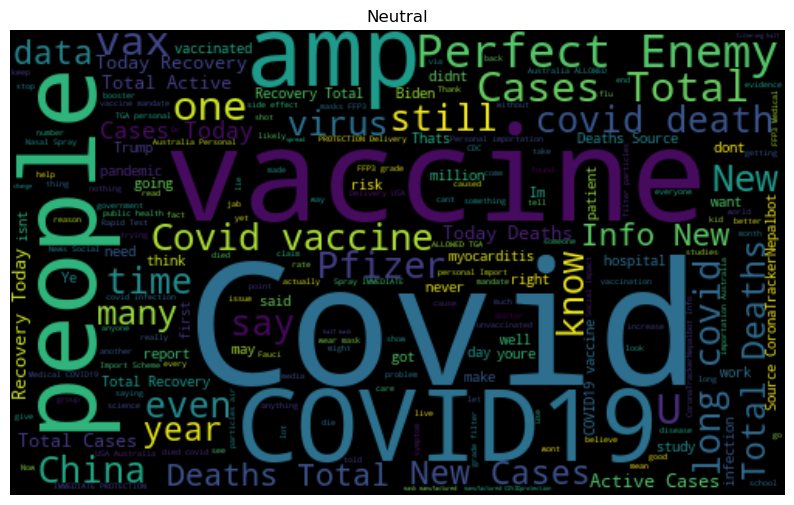

<Figure size 1000x800 with 0 Axes>

In [29]:
plt.figure(figsize = (10,8))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(positive_tweet, 'Positive')
cloud_of_Words(negative_tweet, 'Negative')
cloud_of_Words(neutral_tweet, 'Neutral')

### Bar Chart

21656
8888
7305


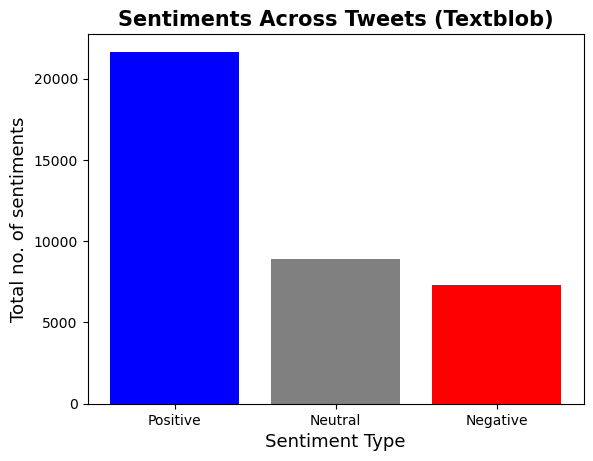

In [30]:
plt.title('Sentiments Across Tweets (Textblob)',fontsize = 15, fontweight = 'bold')

pos_total = data[data['Textblob'] == 'Positive']['Textblob'].count()
neu_total = data[data['Textblob'] == 'Neutral']['Textblob'].count()
neg_total = data[data['Textblob'] == 'Negative']['Textblob'].count()
print(pos_total)
print(neu_total)
print(neg_total)

sentiment_type = ['Positive','Neutral','Negative']
sentiment_total = [pos_total, neu_total, neg_total]

plt.bar(sentiment_type, sentiment_total, color = ['blue', 'grey', 'red'])
plt.ylabel('Total no. of sentiments',fontsize=13)
plt.xlabel('Sentiment Type',fontsize=13)
plt.show()

### <font color=#FF0000>**Sentiment Analysis (Using Sentiment Intensity Analyzer)**</font> <br>

A class in the nltk (Natural Language Toolkit) library of Python that is used for sentiment analysis of text data. Specifically, it is a rule-based sentiment analysis tool that uses a lexicon of words and their associated sentiment scores to compute the overall sentiment of a piece of text.

The SentimentIntensityAnalyzer() class has a polarity_scores() method that takes a string of text as input and returns a dictionary containing the sentiment scores for that text. 

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = data.clean_data.apply(ps)
sentiment_scores

0        {'neg': 0.145, 'neu': 0.727, 'pos': 0.127, 'co...
1        {'neg': 0.405, 'neu': 0.505, 'pos': 0.09, 'com...
2        {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...
3        {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...
4        {'neg': 0.137, 'neu': 0.752, 'pos': 0.111, 'co...
                               ...                        
40881    {'neg': 0.149, 'neu': 0.764, 'pos': 0.087, 'co...
40882    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
40883    {'neg': 0.076, 'neu': 0.859, 'pos': 0.066, 'co...
40884    {'neg': 0.314, 'neu': 0.686, 'pos': 0.0, 'comp...
40885    {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'comp...
Name: clean_data, Length: 39367, dtype: object

In [33]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

neg    neu    pos  compound
0  0.145  0.727  0.127   -0.3716
1  0.405  0.505  0.090   -0.9049
2  0.146  0.854  0.000   -0.3400
3  0.146  0.854  0.000   -0.3400
4  0.137  0.752  0.111   -0.1860

We can see that there is neg for negative sentiment, neu for neutral sentiment, pos for positive sentiment, and compound as the average rate of the sentiment. We will focused on the compound.

For negative sentiment, the compound score will be closer to -1, and the opposite goes for the positive sentiment, which will be closer to 1. Neutral sentiment will be a 0.

For our analysis, we will create another column called label, where we will be labelling the scores based on the compound polarity value

In [34]:
labelize = lambda x : 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['Vader'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

neg    neu    pos  compound     Vader
0  0.145  0.727  0.127   -0.3716  negative
1  0.405  0.505  0.090   -0.9049  negative
2  0.146  0.854  0.000   -0.3400  negative
3  0.146  0.854  0.000   -0.3400  negative
4  0.137  0.752  0.111   -0.1860  negative

In [35]:
filtered_label = data.join(sentiment_df.Vader)
filtered_label.head()

datetime             tweet_id  \
0  2023-02-27 23:55:11+00:00  1630355896990679042   
1  2023-02-27 23:53:35+00:00  1630355498120941568   
2  2023-02-27 23:52:12+00:00  1630355150052155392   
3  2023-02-27 23:52:00+00:00  1630355096205774848   
4  2023-02-27 23:51:45+00:00  1630355033077194756   

                                                text        username  \
0  @KatwithaC @jmarlinmusic @IscariotMeren @Alisa...  RochelleAdame7   
1  @HawkInATX @LankeyPants250 @vancemurphy @TinFo...     brian_tietz   
2  @Ayjchan With DOE finding that a lab leak is t...  LarryBoorstein   
3  With DOE finding that a lab leak is the most l...  LarryBoorstein   
4  Governor DeSantis Rips Authorities &amp; the C...     VigilantFox   

                                                 url  user_location  \
0  https://twitter.com/RochelleAdame7/status/1630...            NaN   
1  https://twitter.com/brian_tietz/status/1630355...            NaN   
2  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
3  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
4  https://twitter.com/VigilantFox/status/1630355...            USA   

   like_count  retweet_count  follower_count  reply_count  verified hashtags  \
0           0              0               5            0     False      NaN   
1           0              0              75            1     False      NaN   
2           0              0            2866            0     False      NaN   
3           0              0            2866            0     False      NaN   
4         662            169          360067           31     False      NaN   

                                          clean_data  \
0  Did I say evil Did I say dont get NEWSFLASHI D...   
1  The thing could POSSIBLY alleviate anger guill...   
2  With DOE finding lab leak likely origin COVID1...   
3  With DOE finding lab leak likely origin COVID1...   
4  Governor DeSantis Rips Authorities amp Corpora...   

                                             results  polarity  subjectivity  \
0  {'polarity': -0.5, 'subjectivity': 0.625, 'sen... -0.500000      0.625000   
1  {'polarity': -0.14166666666666664, 'subjectivi... -0.141667      0.650000   
2  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  0.000000      1.000000   
3  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  0.000000      1.000000   
4  {'polarity': 0.05714285714285714, 'subjectivit...  0.057143      0.400476   

   Textblob     Vader  
0  Negative  negative  
1  Negative  negative  
2   Neutral  negative  
3   Neutral  negative  
4  Positive  negative

### Word Cloud

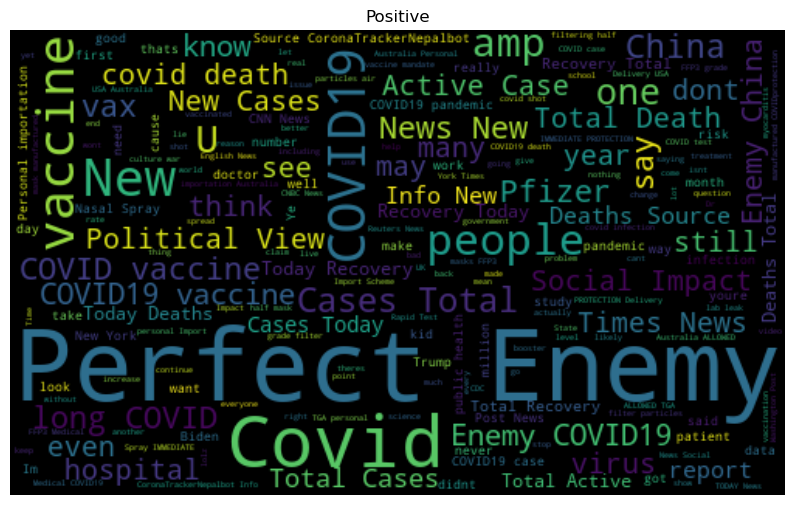

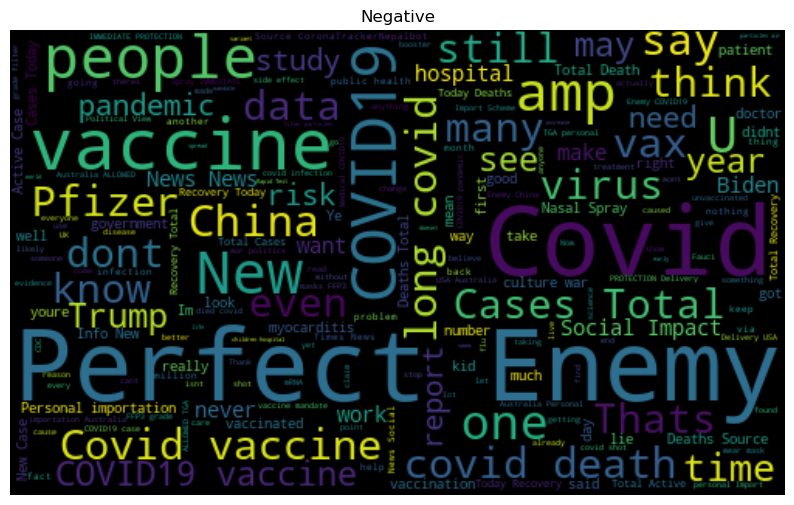

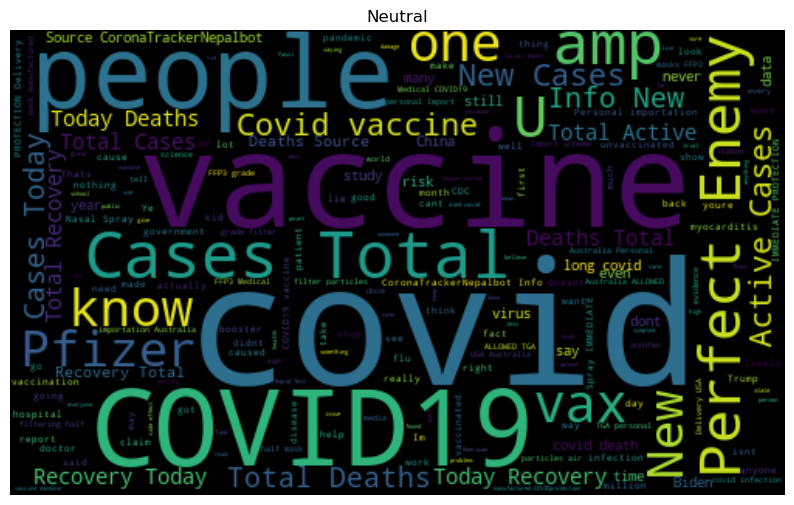

<Figure size 1000x800 with 0 Axes>

In [45]:
# categorized tweets in seperate Series
positive_tweet =  filtered_label[filtered_label['Vader'] == 'positive']['clean_data']
negative_tweet =  filtered_label[filtered_label['Vader'] == 'negative']['clean_data']
neutral_tweet = filtered_label[filtered_label['Vader'] == 'neutral']['clean_data']

# Function for creating WordClouds
def cloud_of_Words(tweets,title):
    forcloud = ' '.join([tweet for tweet in tweets])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))
    
plt.figure(figsize = (10,8))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(positive_tweet, 'Positive')
cloud_of_Words(negative_tweet, 'Negative')
cloud_of_Words(neutral_tweet, 'Neutral')

### Bar Chart

16260
5513
16076


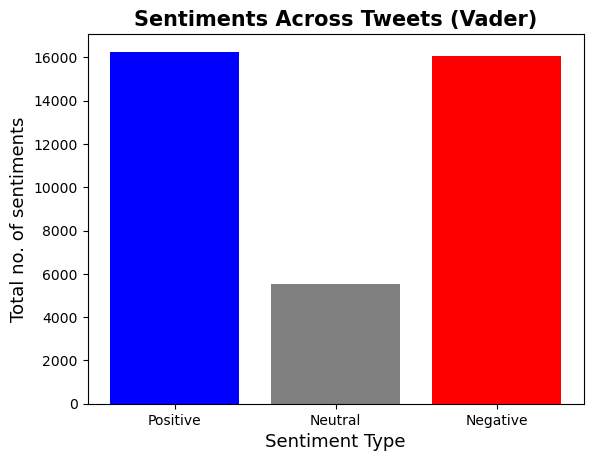

In [37]:
plt.title('Sentiments Across Tweets (Vader)',fontsize = 15, fontweight = 'bold')

pos_total = filtered_label[filtered_label['Vader'] == 'positive']['Vader'].count()
neu_total = filtered_label[filtered_label['Vader'] == 'neutral']['Vader'].count()
neg_total = filtered_label[filtered_label['Vader'] == 'negative']['Vader'].count()
print(pos_total)
print(neu_total)
print(neg_total)

sentiment_type = ['Positive','Neutral','Negative']
sentiment_total = [pos_total, neu_total, neg_total]

plt.bar(sentiment_type, sentiment_total, color = ['blue', 'grey', 'red'])
plt.ylabel('Total no. of sentiments',fontsize=13)
plt.xlabel('Sentiment Type',fontsize=13)
plt.show()

### Time Series (Vader)

In [38]:
filtered_label['datetime'] = pd.to_datetime(filtered_label.datetime).dt.date
filtered_label['datetime']

0        2023-02-27
1        2023-02-27
2        2023-02-27
3        2023-02-27
4        2023-02-27
            ...    
40881    2022-12-01
40882    2022-12-01
40883    2022-12-01
40884    2022-12-01
40885    2022-12-01
Name: datetime, Length: 39367, dtype: object

In [39]:
filtered_label.head()

datetime             tweet_id  \
0  2023-02-27  1630355896990679042   
1  2023-02-27  1630355498120941568   
2  2023-02-27  1630355150052155392   
3  2023-02-27  1630355096205774848   
4  2023-02-27  1630355033077194756   

                                                text        username  \
0  @KatwithaC @jmarlinmusic @IscariotMeren @Alisa...  RochelleAdame7   
1  @HawkInATX @LankeyPants250 @vancemurphy @TinFo...     brian_tietz   
2  @Ayjchan With DOE finding that a lab leak is t...  LarryBoorstein   
3  With DOE finding that a lab leak is the most l...  LarryBoorstein   
4  Governor DeSantis Rips Authorities &amp; the C...     VigilantFox   

                                                 url  user_location  \
0  https://twitter.com/RochelleAdame7/status/1630...            NaN   
1  https://twitter.com/brian_tietz/status/1630355...            NaN   
2  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
3  https://twitter.com/LarryBoorstein/status/1630...  Virginia, USA   
4  https://twitter.com/VigilantFox/status/1630355...            USA   

   like_count  retweet_count  follower_count  reply_count  verified hashtags  \
0           0              0               5            0     False      NaN   
1           0              0              75            1     False      NaN   
2           0              0            2866            0     False      NaN   
3           0              0            2866            0     False      NaN   
4         662            169          360067           31     False      NaN   

                                          clean_data  \
0  Did I say evil Did I say dont get NEWSFLASHI D...   
1  The thing could POSSIBLY alleviate anger guill...   
2  With DOE finding lab leak likely origin COVID1...   
3  With DOE finding lab leak likely origin COVID1...   
4  Governor DeSantis Rips Authorities amp Corpora...   

                                             results  polarity  subjectivity  \
0  {'polarity': -0.5, 'subjectivity': 0.625, 'sen... -0.500000      0.625000   
1  {'polarity': -0.14166666666666664, 'subjectivi... -0.141667      0.650000   
2  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  0.000000      1.000000   
3  {'polarity': 0.0, 'subjectivity': 1.0, 'sentim...  0.000000      1.000000   
4  {'polarity': 0.05714285714285714, 'subjectivit...  0.057143      0.400476   

   Textblob     Vader  
0  Negative  negative  
1  Negative  negative  
2   Neutral  negative  
3   Neutral  negative  
4  Positive  negative

In [40]:
data_vader = filtered_label[['username', 'datetime', 'Vader']].groupby(['datetime', 'Vader']).count().reset_index()
data_vader.columns = ['date', 'Vader', 'counts']
data_vader.head()

date     Vader  counts
0  2022-12-01  negative     154
1  2022-12-01   neutral      53
2  2022-12-01  positive     103
3  2022-12-02  negative     161
4  2022-12-02   neutral      53

In [41]:
px.line(data_vader, x='date', y='counts', color='Vader', color_discrete_sequence=['red', 'grey', 'blue'], title='COVID-19 Vaccines Sentiment Analysis (Vader)')

### Time Series (Textblob)

In [42]:
data_Textblob = filtered_label[['username', 'datetime', 'Textblob']].groupby(['datetime', 'Textblob']).count().reset_index()
data_Textblob.columns = ['date', 'Textblob', 'counts']
data_Textblob.head()

date  Textblob  counts
0  2022-12-01  Negative      66
1  2022-12-01   Neutral     104
2  2022-12-01  Positive     140
3  2022-12-02  Negative      88
4  2022-12-02   Neutral      91

In [43]:
px.line(data_Textblob, x='date', y='counts', color='Textblob', color_discrete_sequence=['red', 'grey', 'blue'], title='COVID-19 Vaccines Sentiment Analysis (Textblob)')